In [1]:
# tensorflow 2+
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

pretrained model 불러서 학습시킬 것이다.

## Load model

In [2]:
facenet = cv2.dnn.readNet('mask_model/deploy.prototxt.txt', 'mask_model/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('mask_model/mask_detector.model')

## Load Image

(300, 450, 3)


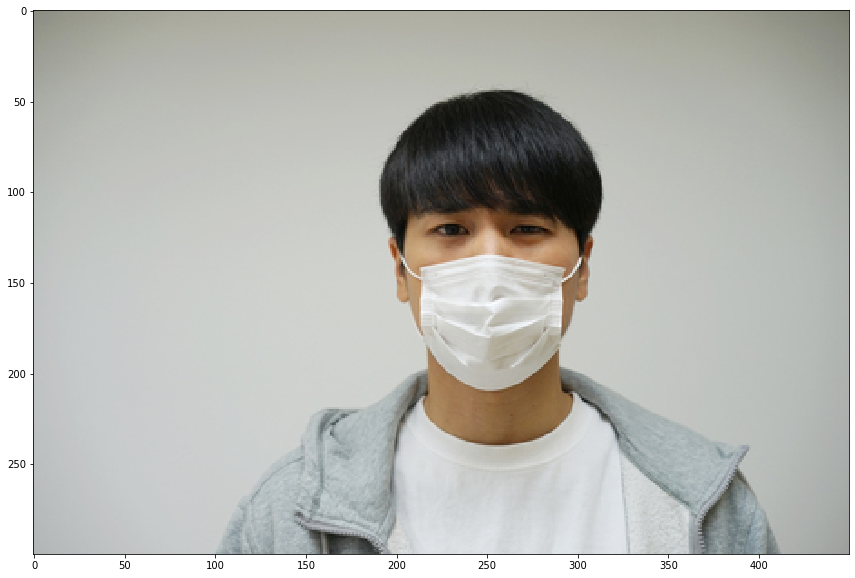

In [3]:
img = cv2.imread('./images/maskman.jpg')
h, w = img.shape[:2]
print(img.shape)
plt.figure(figsize=(16, 10))
plt.imshow(img[:,:,::-1])

## Preprocess Image for Face Detection

In [4]:
blob = cv2.dnn.blobFromImage(img, scalefactor=1, size=(300,300), mean=(104., 177., 123.))
facenet.setInput(blob)
dets = facenet.forward()

## Detect Faces

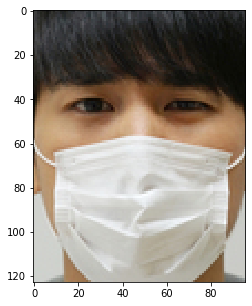

In [5]:
faces = []

for i in range(dets.shape[2]):
    confidence = dets[0,0,i,2]
    if confidence < 0.5:
        continue
    
    x1 = int(dets[0, 0, i, 3]*w)
    y1 = int(dets[0, 0, i, 4]*h)
    x2 = int(dets[0, 0, i, 5]*w)
    y2 = int(dets[0, 0, i, 6]*h)
    
    face = img[y1:y2, x1:x2]
    faces.append(face)
    
plt.figure(figsize=(16,5))

for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:,:,::-1])

## Detect Masks from Faces

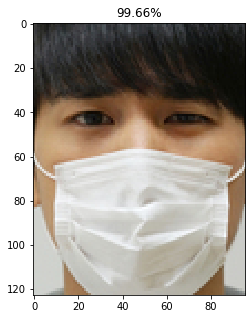

In [6]:
plt.figure(figsize=(16,5))
for i, face in enumerate(faces):
    face_input = cv2.resize(face, dsize=(224,224))
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)
    
    mask, nomask = model.predict(face_input).squeeze()
    
    plt.subplot(1, len(faces),i+1)
    plt.imshow(face[:,:,::-1])
    plt.title('%.2f%%' % (mask * 100))

faceinput shape (224, 224, 3)
expand_dims 이후 faceinput shape (1, 224, 224, 3)
squeeze 전 predict: [[0.99656916 0.00343086]] (1, 2)
squeeze 후 predict: [0.99656916 0.00343086] (2,)
mask: 0.99656916 nomask 0.003430859


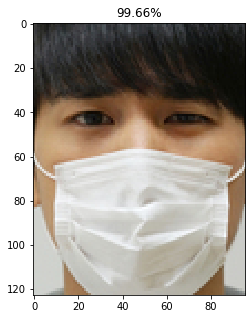

In [7]:
# shape 변화 확인용
plt.figure(figsize=(16,5))
for i, face in enumerate(faces):
    face_input = cv2.resize(face, dsize=(224,224))
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
    face_input = preprocess_input(face_input)
    print('faceinput shape', face_input.shape)
    face_input = np.expand_dims(face_input, axis=0)
    print('expand_dims 이후 faceinput shape', face_input.shape)
    
    predict = model.predict(face_input)
    print('squeeze 전 predict:', predict, predict.shape)
    mask, nomask = predict.squeeze()
    print('squeeze 후 predict:', predict.squeeze() , predict.squeeze().shape)
    print('mask:',mask, 'nomask', nomask)
    
    plt.subplot(1, len(faces),i+1)
    plt.imshow(face[:,:,::-1])
    plt.title('%.2f%%' % (mask * 100))